In [157]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score 



In [159]:
file_path = r"C:\Users\Karmveer Singh\Downloads\diabetes.csv"
dataset = pd.read_csv(file_path)
print ( len(dataset))
print ( dataset.head()) 

768
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [161]:
# Replace zeroes
zero_not_accepted = [ 'Glucose','BloodPressure','SkinThickness','BMI','Insulin']
for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0,np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN,mean)


In [163]:
# splite dataset 
x = dataset.iloc[:,0:8]
y = dataset.iloc[:,8]
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0, test_size=0.2)

In [165]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [167]:
# Define the model : Init K-NN 
classifier = KNeighborsClassifier(n_neighbors=11, p=2,metric='euclidean')

In [169]:
# predict the test set results 
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [171]:
# Evaluate Model 
cm = confusion_matrix(y_test,y_pred)
print (cm) 

[[94 13]
 [15 32]]


In [173]:
print(f1_score(y_test, y_pred))

0.6956521739130435


In [175]:
#precision score
from sklearn.metrics import  precision_score
precision = precision_score(y_test,y_pred)
print("Precision:", precision)


Precision: 0.7111111111111111


In [177]:
# recall score 
from sklearn.metrics import  recall_score
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 0.6808510638297872


In [179]:
# accuracy score 
print( accuracy_score(y_test, y_pred))

0.8181818181818182


AUC: 0.848180552793796


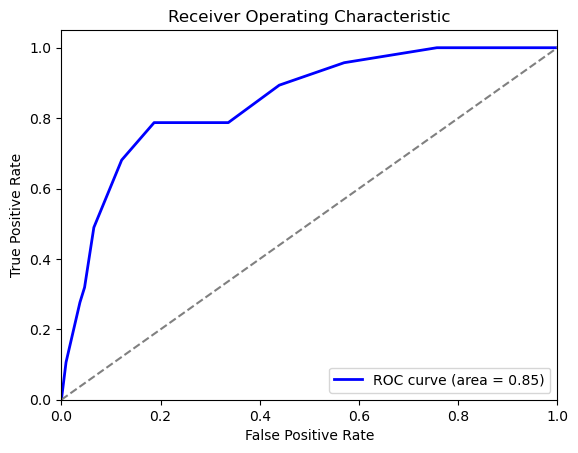

In [181]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
y_pred_proba = knn.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc_score)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()